# Intuition behind PCA

Principal component analysis (PCA) is a dimensionality reduction technique that aims to project data into a lower dimensional space while preserving important properties of the data, such as relative distances between data points. This is similar to other dimensionality reduction methods like t-SNE and UMAP. The goal of PCA is to retain as much information about the original high-dimensional data as possible, which is achieved by choosing an orthogonal basis (the principal components) that maximises the variance in the data. This is equivalent to minimising the residuals in the projected subspace. 

The objective of (PCA) is to project a dataset $X \in \mathbb{R}^{n \times d}$ into a lower dimensional vector $v \in \mathbb{R}^{d}$ s.t $\langle\,v,v\rangle=\|v\| = 1$. The $i$-th projection is $y_i=\langle\, x_i,v\rangle v$

## Maximising Variance


\begin{equation}
\begin{split}
&v^{*}=\operatorname*{argmax}_v \frac{1}{N}\sum_{i=1}^{N}\langle\, x_i,v\rangle^{2}\\
 &= \operatorname*{argmax}_v \frac{1}{N}\sum_{i=1}^{N}(v^{T}x_i-v^{T}\bar x_i)^{2}\\
&=
v^{T}(\frac{1}{N}\sum_{i=1}^{N}(x_i-\bar x_i))v \\
&= v^{T} \Sigma v 

\end{split}
\end{equation}


Where $\Sigma$ is the covariance matrix. We define the Lagrangian for this problem as follows:

\begin{equation}
\mathcal{L}(v,\lambda) = v^{T} \Sigma v - \lambda(v^Tv-1)
\end{equation}



\begin{align*}
 \frac{\partial \mathcal{L}(v,\lambda)}{\partial v} = 2\Sigma v - 2\lambda v = 0 \\
\implies \Sigma v = \lambda v
\end{align*}


The magnitude of the eigenvalues is proportional to the variance in the direction of that vector, i.e $\lambda_{1} \geq \lambda_{2},...,\lambda_{d}$. 

## Minimising projected squared residuals


\begin{equation}
\begin{split}
&\operatorname*{argmin}_v \frac{1}{N}\sum_{i=1}^{N}\| x_i - \langle\,x_i,v\rangle v\|^2\\
&=\frac{1}{N}\sum_{i=1}^{N}\| x_i\|^2 - 2\langle\,x_i,v\rangle^2 + \langle\,x_i,v\rangle^2  \|v\|^2 \\
&\mathop{\mathbb{E}(\langle\,x_i,v\rangle ^2)}= \frac{-1}{N}\sum_{i=1}^{N}  \langle\,x_i,v\rangle^2 \\
\end{split}
\end{equation}


Recognising that variance can the written as follows:

\begin{equation}
\mathop{\mathbb{V}(X)} = \mathop{\mathbb{E}(X^2)}-\mathop{\mathbb{E}(X)^2}
\end{equation}

We can do the following substitution

\begin{equation}
\begin{split}
- \mathop{\mathbb{E}(\langle\,x,v\rangle ^2)} 
&=\mathop{\mathbb{V}(\langle\,x,v\rangle)} + \mathop{\mathbb{E}(\langle\,x,v\rangle )^2}
\end{split}
\end{equation}

Based on the assumption that the data follow a Gaussian distribution with a mean of zero, we can obtain $\mathop{\mathbb{E}(\langle\,x,v\rangle )^2}=\langle\,0,v\rangle = 0$


\begin{align}
- \mathop{\mathbb{E}(\langle\,x,v\rangle ^2)} 
=\mathop{\mathbb{V}(\langle\,x,v\rangle)}\\
v^{*} =\operatorname*{argmax}_v \mathop{\mathbb{V}(\langle\,x,v\rangle)}
\end{align}


This gives us an expression that maximizes the variance in the projected data which is the optimisation problem we started with.

## Finding eigenvalues

Computing the covariance matrix $\Sigma$ may result in precision losses which will impact the eigenvalues. Instead we can determine the eignevalues directly $X$. This cab be done using SVD which decomposes the $X$ into $X = U\Sigma V^T$. The matrix $V$ contains the principal components therefore we only need to compute $XV^T$ to project the data.



### Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

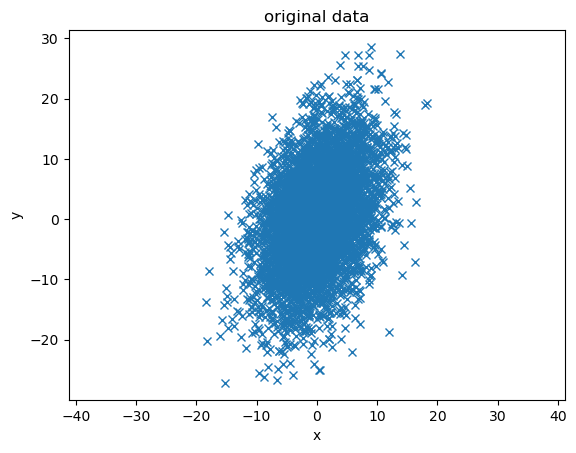

In [2]:
np.random.seed(1)
mean = [0, 0]
cov = [[25, 16],
      [16, 65]]

x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.title('original data')
plt.show()

In [3]:
mat = np.matrix([x, y]).T
U, S, V = np.linalg.svd(mat, full_matrices=True)
pca = np.matmul(mat, V) # project X into V

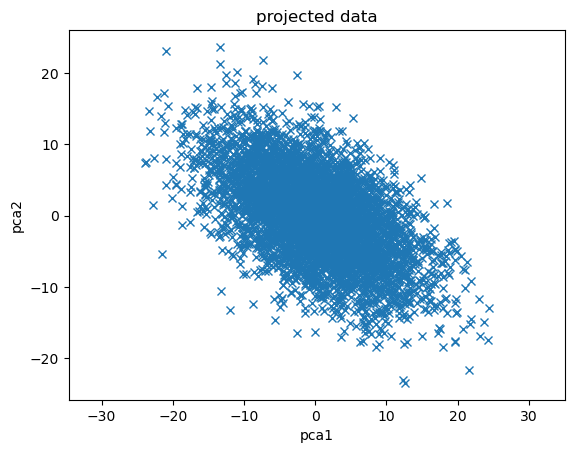

In [4]:
plt.plot(pca[:, 0], pca[:, 1], 'x')
plt.axis('equal')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('projected data')
plt.show()

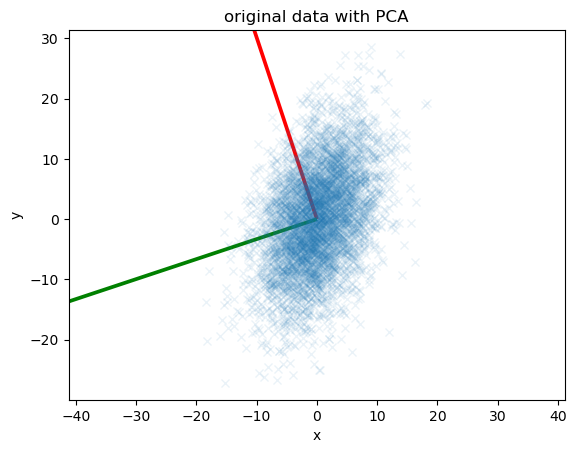

In [5]:
plt.plot(x, y, 'x',alpha=0.09)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.title('original data with PCA')


scaled_eigen_vector_1 = V[:, 0] * S [0]
scaled_eigen_vector_2 = V[:, 1] * S[1]
plt.quiver(0, 0, scaled_eigen_vector_1[0], scaled_eigen_vector_1[1], color=['r'], angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, scaled_eigen_vector_2[0], scaled_eigen_vector_2[1], color=['g'], angles='xy', scale_units='xy', scale=1)
plt.show()

Eigenvalues

In [6]:
eig_val = (S**2) / (mat.shape[1]-1)
eig_val

array([178268.48447614,  47738.6581594 ])

 $\lambda_{1} \geq \lambda_{2}$

Explained variance

In [7]:
eig_vals = (S**2) / (mat.shape[1]-1)
eig_vals/eig_vals.sum()

array([0.78877368, 0.21122632])

Compare with sklearn PCA

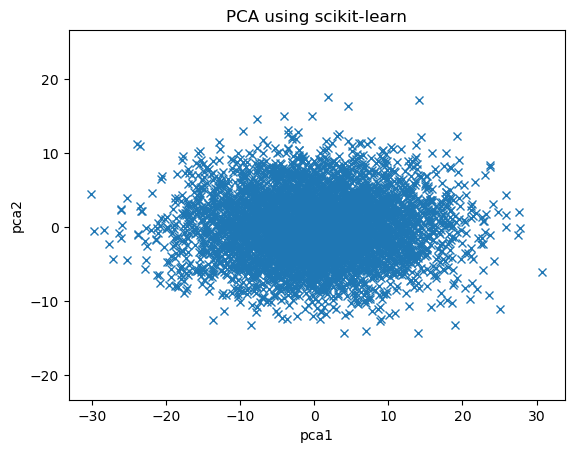

Explained variance ratio: [0.78873992 0.21126008]


In [8]:
from sklearn.decomposition import PCA

mat_trans = np.asarray(mat)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(mat_trans)

# Plot the results
plt.plot(pca_result[:, 0], pca_result[:, 1], 'x')
plt.axis('equal')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('PCA using scikit-learn')
plt.show()

explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")